In [1]:
import numpy as np

# generates a ValueError
np.array([[0.0, 1.1, 2.2], [], [3.3, 4.4], [5.5], [6.6, 7.7, 8.8, 9.9]])

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (5,) + inhomogeneous part.

In [2]:
import awkward as ak

ak.Array([[0.0, 1.1, 2.2], [], [3.3, 4.4], [5.5], [6.6, 7.7, 8.8, 9.9]])

<Array [[0, 1.1, 2.2], [], ..., [6.6, 7.7, 8.8, 9.9]] type='5 * var * float64'>

In [5]:
array = ak.Array([[0.0, 1.1, 2.2], [], [3.3, 4.4], [5.5], [6.6, 7.7, 8.8, 9.9]])
array.tolist()

array[2]
array[-1, 1]
array[2:, 0]
array[2:, 1:]
#array[:, 0]

<Array [[4.4], [], [7.7, 8.8, 9.9]] type='3 * var * float64'>

In [4]:
array[[True, False, True, False, True]]

array[[2, 3, 3, 1]]

<Array [[3.3, 4.4], [5.5], [5.5], []] type='4 * var * float64'>

In [6]:
ak.num(array)

ak.num(array) > 0

array[ak.num(array) > 0, 0]
array[ak.num(array) > 1, 1]

<Array [1.1, 4.4, 7.7] type='3 * float64'>

In [7]:
cut = array * 10 % 2 == 0

array[cut]

<Array [[0, 2.2], [], [4.4], [], [6.6, 8.8]] type='5 * var * float64'>

In [8]:
import uproot

file = uproot.open(
    "root://eospublic.cern.ch//eos/opendata/cms/derived-data/AOD2NanoAODOutreachTool/Run2012BC_DoubleMuParked_Muons.root"
)
tree = file["Events"]

muon_pt = tree["Muon_pt"].array(entry_stop=10)

In [9]:
particle_cut = muon_pt > 20
muon_pt[particle_cut]

<Array [[], [], [], [], ..., [...], [23.9], [], []] type='10 * var * float32'>

In [10]:
event_cut = ak.any(muon_pt > 20, axis=1)
muon_pt[event_cut]

<Array [[3.28, 3.64, 32.9, 23.7], ..., [11.3, ...]] type='3 * var * float32'>

In [14]:
event_cut = ak.max(muon_pt, axis = 1) > 20
muon_pt[event_cut]

<Array [[3.28, 3.64, 32.9, 23.7], ..., [...]] type='3 * option[var * float32]'>

In [16]:
event_cut = ak.any(muon_pt > 20, axis=1)
particle_cut = muon_pt > 20
cleaned = muon_pt[event_cut][particle_cut[event_cut]]
cleaned

<Array [[32.9, 23.7], [57.6, 53], [23.9]] type='3 * var * float32'>

In [17]:
cleaned = muon_pt[particle_cut]
final_result = cleaned[event_cut]
final_result.tolist()

[[32.911224365234375, 23.72175407409668],
 [57.6067008972168, 53.04507827758789],
 [23.906352996826172]]

In [18]:
numbers = ak.Array([[1, 2, 3], [], [5, 7], [11]])
letters = ak.Array([["a", "b"], ["c"], ["d"], ["e", "f"]])

pairs = ak.cartesian((numbers, letters))

In [21]:
pairs["0"]
pairs["1"]

<Array [['a', 'b', 'a', 'b', 'a', 'b'], [], ..., [...]] type='4 * var * string'>

In [22]:
import uproot
import awkward as ak

file = uproot.open(
    "root://eospublic.cern.ch//eos/opendata/cms/derived-data/AOD2NanoAODOutreachTool/Run2012BC_DoubleMuParked_Muons.root"
)
tree = file["Events"]

arrays = tree.arrays(filter_name="/Muon_(pt|eta|phi|charge)/", entry_stop=10000)

muons = ak.zip(
    {
        "pt": arrays["Muon_pt"],
        "eta": arrays["Muon_eta"],
        "phi": arrays["Muon_phi"],
        "charge": arrays["Muon_charge"],
    }
)

arrays.type
muons.type

ArrayType(ListType(RecordType([NumpyType('float32'), NumpyType('float32'), NumpyType('float32'), NumpyType('int32')], ['pt', 'eta', 'phi', 'charge'])), 10000, None)

In [23]:
pairs = ak.combinations(muons, 2)

pairs.type

ArrayType(ListType(RecordType([RecordType([NumpyType('float32'), NumpyType('float32'), NumpyType('float32'), NumpyType('int32')], ['pt', 'eta', 'phi', 'charge']), RecordType([NumpyType('float32'), NumpyType('float32'), NumpyType('float32'), NumpyType('int32')], ['pt', 'eta', 'phi', 'charge'])], None)), 10000, None)

In [24]:
mu1, mu2 = ak.unzip(pairs)

In [25]:
import numpy as np

mass = np.sqrt(
    2 * mu1.pt * mu2.pt * (np.cosh(mu1.eta - mu2.eta) - np.cos(mu1.phi - mu2.phi))
)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x168581e90>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

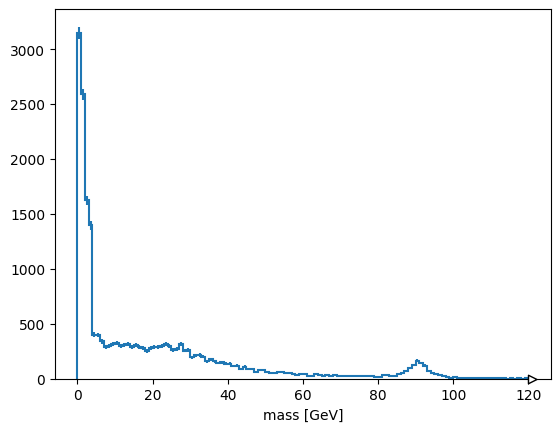

In [26]:
import hist

hist.Hist(hist.axis.Regular(120, 0, 120, label="mass [GeV]")).fill(
    ak.ravel(mass)
).plot()

In [27]:
ak.max(mass, axis=1)

<Array [34.4, 27.9, None, 26.2, ..., 42.9, 0.252, 93.4] type='10000 * ?float32'>

In [28]:
ak.flatten(ak.max(mass, axis=1), axis=0)

<Array [34.4, 27.9, 26.2, 18.2, ..., 42.9, 0.252, 93.4] type='8880 * float32'>

In [29]:
ak.max(mass[ak.num(mass) > 0], axis=1)

<Array [34.4, 27.9, 26.2, 18.2, ..., 42.9, 0.252, 93.4] type='8880 * ?float32'>

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x175ff89d0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

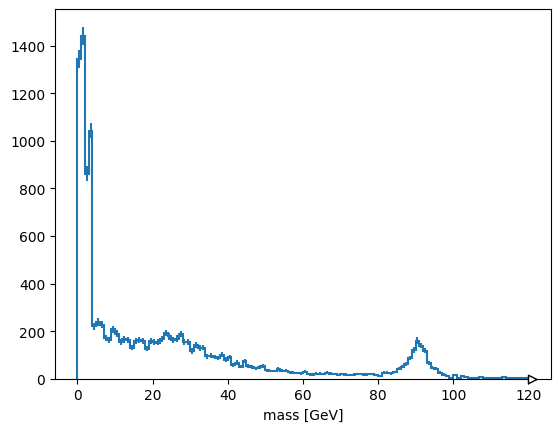

In [31]:
cut = (mu1.charge != mu2.charge)
hist.Hist(hist.axis.Regular(120, 0, 120, label="mass [GeV]")).fill(

    ak.ravel(mass[cut])

).plot()

In [35]:
import particle, hepunits

zmass = particle.Particle.findall("Z0")[0].mass / hepunits.GeV

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x1772969d0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

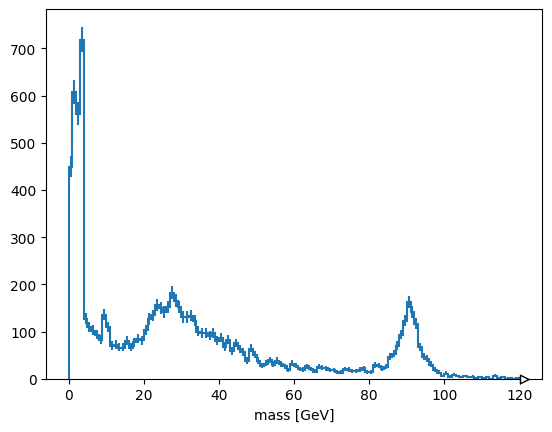

In [43]:
which = ak.argmin(abs(mass - zmass), axis=1, keepdims=True)
selected_mass = ak.ravel(mass[which])
valid_mass = selected_mass[~ak.is_none(selected_mass)]
h = hist.Hist(hist.axis.Regular(120, 0, 120, label="mass [GeV]"))
h.fill(valid_mass)
h.plot()
